# Analisis Timeseries data Meteorologi dengan Matplotlib

Timeseries adalah analisis sekumpulan data pengamatan/observasi yang diurutkan berdasarkan waktu. Contoh : Timeseries data suhu perjam selama tahun 2023, Timeseries curah hujan harian DJF, dll.​

Karakteristik Utama : Urutan waktu, Interval waktu, Tren, Musiman, Cyclical​

Data yang digunakan : data_megaentry_2023.csv

## Plotting Parameter Cuaca setahun

### 1. Plotting Data Timeseries Td (Titik Embun) 2023

### Import Module

In [ ]:
#Import module yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings
warnings.simplefilter("ignore", UserWarning)


### Load data csv

In [ ]:
# Load data megaentry
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DEWPOINT C TDTDTD'])

df

### Konversi kolom 'DATA TIMESTAMP' ke format datetime

In [ ]:
# Convert kolom 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

df['DATA TIMESTAMP']

### Ekstrak data Td dan konversi ke numerik, dan handling error

In [ ]:
# Extract the dewpoint temperature (Td) and convert it to numeric, handling errors
df['TEMP DEWPOINT C TD'] = pd.to_numeric(df['TEMP DEWPOINT C TDTDTD'], errors='coerce')
df['TEMP DEWPOINT C TD']

### Plotting timeseries

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['DATA TIMESTAMP'], df['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.title('Timeseries Dewpoint Temperature (Td) 2023 ')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d %H:%M:%S"))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## 2. Plotting Seasonal Td Periode MJJ (May Juni Juli) 2023 

### Filter Seasonal Dewpoint Temperature MJJ

In [ ]:
# Filter data untuk MJJ ( May, Juni, and Juli)
df_mjj = df[df['DATA TIMESTAMP'].dt.month.isin([5, 6, 7])]

df_mjj

### Plotting Seasonal 

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_mjj['DATA TIMESTAMP'], df_mjj['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

plt.title('Dewpoint Temperature MJJ Period')
plt.xlabel('Date')
plt.ylabel('Dewpoint Temperature (°C)')

plt.tight_layout()
plt.show()

## Latihan 1
Buatlah Plot Seasonal Parameter Temperatur pada periode JJA (Juni Juli Agustus) 2023 dengan menggunakan data yang sama dengan sebelumnya

In [ ]:
df2 = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])
df2['DATA TIMESTAMP'] = pd.to_datetime(df2['DATA TIMESTAMP'])

# Extract the temperature (T) and convert it to numeric, handling errors
df2['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df2['TEMP DRYBULB C TTTTTT'], errors='coerce')
df2['TEMP DRYBULB C TTTTTT']

# Filter data untuk MJJ ( May, Juni, and Juli)
df2_JJA = df2[df2['DATA TIMESTAMP'].dt.month.isin([6, 7, 8])]

df2_JJA

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df2_JJA['DATA TIMESTAMP'], df2_JJA['TEMP DRYBULB C TTTTTT'], marker='o', linestyle='-', color='blue')

plt.title('Temperature JJA Period')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

## 3. Plotting Diurnal Td pada tanggal 22 Mei 2023

### Filter Diurnal Dewpoint Temperature (Td)

In [ ]:
# Filter data for May 22, 2023
df_may22 = df[(df['DATA TIMESTAMP'].dt.year == 2023) & 
              (df['DATA TIMESTAMP'].dt.month == 5) & 
              (df['DATA TIMESTAMP'].dt.day == 22)]

### Plotting Diurnal

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_may22['DATA TIMESTAMP'], df_may22['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

plt.title('Diurnal Dewpoint Temperature on May 22, 2023')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')

plt.tight_layout()
plt.show()

## Latihan 2
Buatlah Plot Diurnal Parameter Td pada tanggal 31 Juli 2023 dengan menggunakan data yang sama dengan sebelumnya

In [ ]:
# Filter data for July 31, 2023
df_july31 = df[(df['DATA TIMESTAMP'].dt.year == 2023) & 
              (df['DATA TIMESTAMP'].dt.month == 7) & 
              (df['DATA TIMESTAMP'].dt.day == 31)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_july31['DATA TIMESTAMP'], df_july31['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

plt.title('Diurnal Dewpoint Temperature on July 31, 2023')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')

plt.tight_layout()
plt.show()

## Plotting Windrose

## 1. Plot Windrose Tahunan

### Import Module

In [ ]:
#Import module yang diperlukan
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)


### Load Data Csv

In [ ]:
# Load data
df = pd.read_csv('data_megaentry_2023.csv', usecols=['WIND DIR DEG DD', 'WIND SPEED FF'])
df

## Cleaning, Filtering, dan Menghilangkan missing data

In [ ]:
# Proses pembersihan data:  menghilangkan missing atau nilai non-numeric
df = df.dropna()
df['WIND DIR DEG DD'] = pd.to_numeric(df['WIND DIR DEG DD'], errors='coerce')
df['WIND SPEED FF'] = pd.to_numeric(df['WIND SPEED FF'], errors='coerce')
df = df.dropna()

# Exclude rows where wind direction is 0 degrees
df = df[df['WIND DIR DEG DD'] > 0]

# Convert wind direction and speed to numpy arrays
wind_direction = df['WIND DIR DEG DD'].values
wind_speed = df['WIND SPEED FF'].values


## Plotting Windrose

In [ ]:
# Create a wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

plt.title('Wind Rose Plot 2023')
plt.show()

## Plotting Trend Temperature 

### Import Module

In [ ]:
#Import module yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load data csv

In [ ]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])
df

### Convert and extract month data dari 'DATA TIMESTAMP'

In [ ]:
# Convert the 'DATA TIMESTAMP' column to datetime format and extract month
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month


### Filter Seasonal data MAM, JJA, SON

In [ ]:
# Filter data for each season
mam = df[df['Month'].isin([3, 4, 5])]
jja = df[df['Month'].isin([6, 7, 8])]
son = df[df['Month'].isin([9, 10, 11])]

### Pendefinisian Function untuk Plotting dan Looping

In [ ]:
# Function to plot each season
def plot_season(season_df, season_name):
    plt.figure(figsize=(10, 6))
    plt.plot(season_df['DATA TIMESTAMP'], season_df['TEMP DRYBULB C TTTTTT'], label='Temperature', marker='o', linestyle='-', color='blue')
    
    # Calculate and plot trend line
    x = np.arange(len(season_df))
    y = season_df['TEMP DRYBULB C TTTTTT']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(season_df['DATA TIMESTAMP'], intercept + slope*x, 'r', label='Trend line')
    
    # Display properties
    max_temp = y.max()
    min_temp = y.min()
    avg_temp = y.mean()
    plt.title(f'{season_name} Season Temperature\nMax: {max_temp}°C, Min: {min_temp}°C, Avg: {avg_temp:.2f}°C')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each season
plot_season(mam, 'MAM')
plot_season(jja, 'JJA')
plot_season(son, 'SON')

## Latihan 3
Buatlah Plot Seasonal Windrose MAM, JJA dan SON 2023 dengan menggunakan data yang sama dengan sebelumnya

In [ ]:
# Import necessary modules
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)

# Load data
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'WIND DIR DEG DD', 'WIND SPEED FF'])

# Convert 'DATA TIMESTAMP' to datetime
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'], errors='coerce')

# Proses pembersihan data: menghilangkan missing atau nilai non-numeric
df = df.dropna()
df['WIND DIR DEG DD'] = pd.to_numeric(df['WIND DIR DEG DD'], errors='coerce')
df['WIND SPEED FF'] = pd.to_numeric(df['WIND SPEED FF'], errors='coerce')
df = df.dropna()

# Exclude rows where wind direction is 0 degrees
df = df[df['WIND DIR DEG DD'] > 0]

# Define a function to plot windrose for a given season
def plot_windrose(df, season, title):
    wind_direction = df['WIND DIR DEG DD'].values
    wind_speed = df['WIND SPEED FF'].values

    fig = plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(title)
    plt.show()

# Filter data for each season and plot windrose
# MAM: March-April-May
df_mam = df[df['DATA TIMESTAMP'].dt.month.isin([3, 4, 5])]
plot_windrose(df_mam, 'MAM', 'Wind Rose Plot MAM (March-April-May)')

# JJA: June-July-August
df_jja = df[df['DATA TIMESTAMP'].dt.month.isin([6, 7, 8])]
plot_windrose(df_jja, 'JJA', 'Wind Rose Plot JJA (June-July-August)')

# SON: September-October-November
df_son = df[df['DATA TIMESTAMP'].dt.month.isin([9, 10, 11])]
plot_windrose(df_son, 'SON', 'Wind Rose Plot SON (September-October-November)')



## Plotting Monthly Average Temperature

### Import Module

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load Data CSV

In [ ]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT', 'TEMP MAX C TXTXTX', 'TEMP MIN C TNTNTN'])

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi statistik bulanan

In [ ]:
# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month and hour from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Hour'] = df['DATA TIMESTAMP'].dt.hour

# Ensure temperature columns are numeric
df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df['TEMP DRYBULB C TTTTTT'], errors='coerce')
df['TEMP MAX C TXTXTX'] = pd.to_numeric(df['TEMP MAX C TXTXTX'], errors='coerce')
df['TEMP MIN C TNTNTN'] = pd.to_numeric(df['TEMP MIN C TNTNTN'], errors='coerce')

# Group by month and calculate statistics for dry bulb temperature
monthly_stats = df.groupby('Month')['TEMP DRYBULB C TTTTTT'].agg(['mean', 'max', 'min']).reset_index()

### Plotting monthly averaged

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting the average dry bulb temperature
plt.plot(monthly_stats['Month'], monthly_stats['mean'], label='Average Dry Bulb Temperature', marker='o', linestyle='-')

# Adding statistical annotations
for i, row in monthly_stats.iterrows():
    plt.text(row['Month'], row['mean'], f"Max: {row['max']}\nMin: {row['min']}\nMean: {row['mean']:.2f}", ha='center')

plt.title('Monthly Average Dry Bulb Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Latihan 4
Buatlah Plot Monthly average parameter tekanan udara 2023 dengan menggunakan data yang sama dengan sebelumnya

In [ ]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'PRESSURE QFF MB DERIVED'])

# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month and hour from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Hour'] = df['DATA TIMESTAMP'].dt.hour

# Ensure temperature columns are numeric
df['PRESSURE QFF MB DERIVED'] = pd.to_numeric(df['PRESSURE QFF MB DERIVED'], errors='coerce')

# Group by month and calculate statistics for dry bulb temperature
monthly_stats = df.groupby('Month')['PRESSURE QFF MB DERIVED'].agg(['mean', 'max', 'min']).reset_index()

plt.figure(figsize=(12, 6))

# Plotting the average dry bulb temperature
plt.plot(monthly_stats['Month'], monthly_stats['mean'], label='Average Pressure (mb)', marker='o', linestyle='-')

# Adding statistical annotations
for i, row in monthly_stats.iterrows():
    plt.text(row['Month'], row['mean'], f"Max: {row['max']}\nMin: {row['min']}\nMean: {row['mean']:.2f}", ha='center')

plt.title('Monthly Average Pressure (mb)')
plt.xlabel('Month')
plt.ylabel('Pressure (mb)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting Daily Accumulation Hujan dan Kategorisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load data CSV

In [ ]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi akumulasi hujan 

In [ ]:
# Convert 'DATA TIMESTAMP' to datetime and extract month and day
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Day'] = df['DATA TIMESTAMP'].dt.day

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

### Membuat Fungsi Plotting dan Looping dan kategorisasi

In [ ]:
# Function to plot daily rainfall for a given month
def plot_daily_rainfall_for_month(month_number):
    # Filter data for the specified month
    monthly_data = df[df['Month'] == month_number]
    
    # Accumulate daily rainfall
    daily_rainfall = monthly_data.groupby('Day')['RAINFALL LAST MM'].sum()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    daily_rainfall.plot(kind='bar', color='skyblue', label='Daily Rainfall')
    
    # Adding horizontal lines for rainfall classification
    plt.axhline(20, color='green', linestyle='--', label='Light Rain (<20 mm/day)')
    plt.axhline(50, color='yellow', linestyle='--', label='Moderate Rain (20-50 mm/day)')
    plt.axhline(100, color='orange', linestyle='--', label='Heavy Rain (50-100 mm/day)')
    plt.axhline(100, color='red', linestyle='-', label='Extreme Rain (>100 mm/day)')
    
    plt.title(f'Daily Rainfall Accumulation for {calendar.month_name[month_number]}')
    plt.xlabel('Day')
    plt.ylabel('Rainfall (mm)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot daily rainfall for each month
for month in range(1, 13):
    plot_daily_rainfall_for_month(month)

## Latihan 5
Buatlah Plot Kategorisasi ENSO dengan menggunakan data indeks nino 3.4 yang terdapat di github

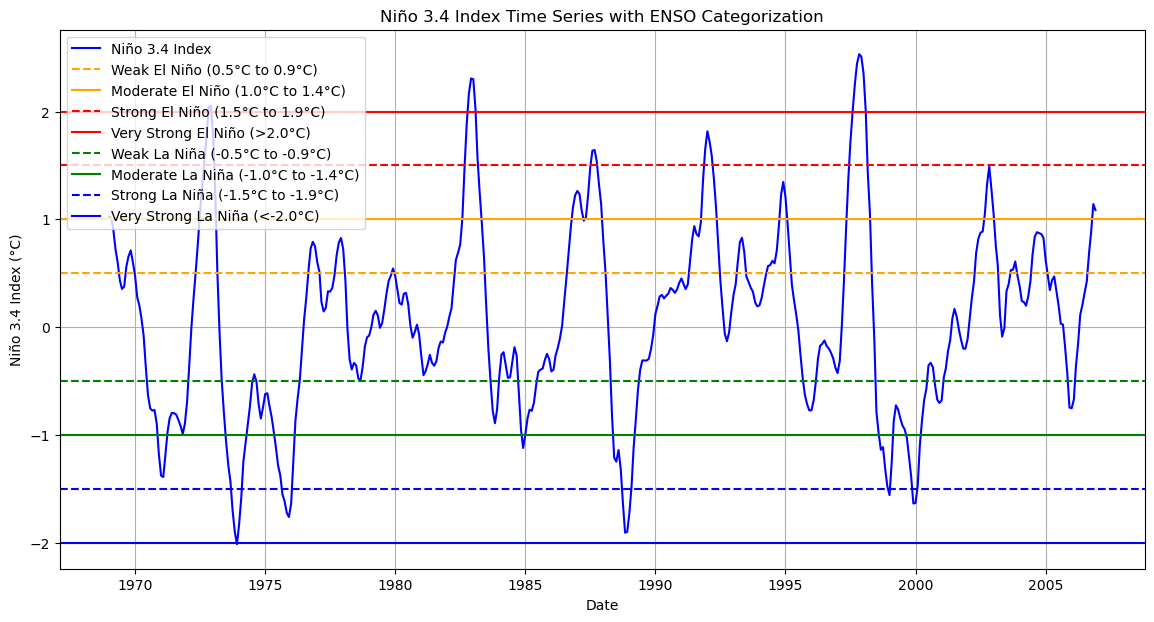

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('nino34_data.csv')

# Ensure the data is sorted by year and month
df = df.sort_values(by=['year', 'month'])

# Create a datetime column for plotting
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['nino 3.4'], label='Niño 3.4 Index', color='blue')

# Add horizontal lines for ENSO categorization
plt.axhline(y=0.5, color='orange', linestyle='--', label='Weak El Niño (0.5°C to 0.9°C)')
plt.axhline(y=1.0, color='orange', linestyle='-', label='Moderate El Niño (1.0°C to 1.4°C)')
plt.axhline(y=1.5, color='red', linestyle='--', label='Strong El Niño (1.5°C to 1.9°C)')
plt.axhline(y=2.0, color='red', linestyle='-', label='Very Strong El Niño (>2.0°C)')
plt.axhline(y=-0.5, color='green', linestyle='--', label='Weak La Niña (-0.5°C to -0.9°C)')
plt.axhline(y=-1.0, color='green', linestyle='-', label='Moderate La Niña (-1.0°C to -1.4°C)')
plt.axhline(y=-1.5, color='blue', linestyle='--', label='Strong La Niña (-1.5°C to -1.9°C)')
plt.axhline(y=-2.0, color='blue', linestyle='-', label='Very Strong La Niña (<-2.0°C)')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Niño 3.4 Index (°C)')
plt.title('Niño 3.4 Index Time Series with ENSO Categorization')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

### Import module yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi akumulasi hujan harian dan curah hujan per 3 jam

In [ ]:
# Convert 'DATA TIMESTAMP' to datetime and filter for March 2, 2023
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df = df[(df['DATA TIMESTAMP'] >= '2023-03-02 00:00:00') & (df['DATA TIMESTAMP'] <= '2023-03-02 23:59:59')]

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Calculate the cumulative sum of rainfall
df['CUMULATIVE RAINFALL'] = df['RAINFALL LAST MM'].cumsum()

### Plotting 

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot 3-hourly rainfall data
plt.plot(df['DATA TIMESTAMP'], df['RAINFALL LAST MM'], label='3-Hourly Rainfall (mm)', marker='o', linestyle='-', color='blue')

# Plot cumulative rainfall data
plt.plot(df['DATA TIMESTAMP'], df['CUMULATIVE RAINFALL'], label='Cumulative Rainfall (mm)', marker='x', linestyle='--', color='red')

# Formatting the plot
plt.title('3-Hourly and Cumulative Rainfall for March 2, 2023')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Plotting Monthly Accumulation Hujan

### Ekstrak data monthly accumulation hujan 

In [ ]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

# Convert 'DATA TIMESTAMP' to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Replace 8888 with 0 in 'RAINFALL LAST MM'
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)

# Convert 'RAINFALL LAST MM' to numeric, just in case it's not
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Group by month and sum the rainfall
monthly_rainfall = df.groupby('Month')['RAINFALL LAST MM'].sum()


### Plotting 

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='skyblue')
plt.title('Monthly Rainfall Accumulation 2023')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Menemukan List Kejadian Hujan Harian berdasarkan kategori 

### Ekstrak data tanggal daily accumulation hujan dan kategorisasi hujan 

In [ ]:
# Convert 'DATA TIMESTAMP' to datetime and extract date (without time)
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP']).dt.date

# Replace 8888 with 0 in 'RAINFALL LAST MM'
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)

# Group by date and sum the rainfall to get daily accumulation
daily_rainfall = df.groupby('DATA TIMESTAMP')['RAINFALL LAST MM'].sum().reset_index()

# Categorize the days based on rainfall amount
no_rain_days = daily_rainfall[daily_rainfall['RAINFALL LAST MM'] == 0]['DATA TIMESTAMP'].tolist()
light_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] > 0) & (daily_rainfall['RAINFALL LAST MM'] < 20)]['DATA TIMESTAMP'].tolist()
moderate_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] >= 20) & (daily_rainfall['RAINFALL LAST MM'] <= 50)]['DATA TIMESTAMP'].tolist()
heavy_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] > 50) & (daily_rainfall['RAINFALL LAST MM'] <= 100)]['DATA TIMESTAMP'].tolist()
extreme_rain_days = daily_rainfall[daily_rainfall['RAINFALL LAST MM'] > 100]['DATA TIMESTAMP'].tolist()


### Print tanggal kejadian hujan berdasarkan kategori

In [ ]:
print('heavy rain :', heavy_rain_days)

# Latihan 6
Buatlah list bulan kejadian Elnino Moderate dengan menggunakan data indeks nino 3.4 yang terdapat di github

El Niño
Weak El Niño: Anomali suhu permukaan laut di wilayah Nino 3.4 antara +0.5°C hingga +0.9°C.
Moderate El Niño: Anomali suhu permukaan laut di wilayah Nino 3.4 antara +1.0°C hingga +1.4°C.
Strong El Niño: Anomali suhu permukaan laut di wilayah Nino 3.4 antara +1.5°C hingga +1.9°C.
Very Strong El Niño: Anomali suhu permukaan laut di wilayah Nino 3.4 lebih dari +2.0°C.
La Niña
Weak La Niña: Anomali suhu permukaan laut di wilayah Nino 3.4 antara -0.5°C hingga -0.9°C.
Moderate La Niña: Anomali suhu permukaan laut di wilayah Nino 3.4 antara -1.0°C hingga -1.4°C.
Strong La Niña: Anomali suhu permukaan laut di wilayah Nino 3.4 antara -1.5°C hingga -1.9°C.
Very Strong La Niña: Anomali suhu permukaan laut di wilayah Nino 3.4 lebih dari -2.0°C.

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('nino34_data (1).csv')

# Ensure the data is sorted by year and month
df = df.sort_values(by=['year', 'month'])

# Filter for Moderate El Niño (Niño 3.4 index between +1.0°C and +1.4°C)
moderate_el_nino = df[(df['nino 3.4'] >= 1.0) & (df['nino 3.4'] <= 1.4)]

# Output the results
print("List of times when Moderate El Niño occurred:")
print(moderate_el_nino[['year', 'month', 'nino 3.4']])
